In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

df = pd.read_csv(r'C:\Users\Newton\Documents\energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df = df.drop(df[['date','lights']], axis=1)
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


[[0.23928945]
 [0.46794238]
 [0.23108472]
 ...
 [0.3001772 ]
 [0.4297256 ]
 [0.3217686 ]]


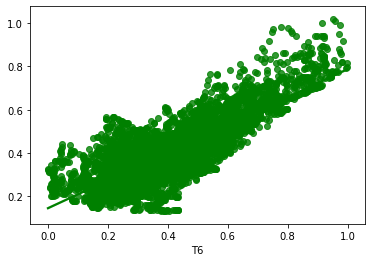

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) # creating the normalised dataset
features_df = normalised_df.drop(columns=['Appliances'], inplace = True)


x = normalised_df[['T2']]  # choosing the predictor
y = normalised_df[['T6']]  #choosing the target variable

# splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42) 
linear_model = LinearRegression().fit(x_train, y_train)  # fitting the model with the training data # model used
LR_pred = linear_model.predict(x_test) # using the model to predict

sns.regplot(x= y_test, y= LR_pred, color='green')

print(LR_pred)

In [8]:
# calculating the R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, LR_pred)
round(r2_score,2)

0.64

In [9]:
# calculating the mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,LR_pred) 
round(mae,2)

0.08

In [10]:
# calculating the residual sum of squares (RSS)
y_testArr = np.array(y_test)
LR_predArr = np.array(LR_pred)
rss = np.sum(np.square(y_testArr-LR_predArr)) # the mathematical formula of RSS is used here
round(rss,2)

66.12

In [11]:
# calculating the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,LR_pred)) # the mathematical formula of RMSE is used here
round(rmse,3)

0.106

In [20]:
# using Ridge regression A.K.A L2 Regularisation on the training dataset
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
ridge_pred = ridge_reg.predict(x_test)
print(ridge_pred)

[[0.23947944]
 [0.46787248]
 [0.23128403]
 ...
 [0.30029798]
 [0.42969914]
 [0.32186484]]


In [21]:
# using Lasso regression A.K.A l1 regularisation on the training dataset
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
lasso_pred = lasso_reg.predict(x_test)
print(lasso_pred)

[0.24666094 0.46523011 0.23881805 ... 0.3048635  0.42869872 0.3255027 ]
